In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

In [6]:
my_data=pd.read_csv('c:/Users/karim/Downloads/data.csv')
my_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print(my_data.columns.tolist())


['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Data cleaning and preproccsing

In [8]:
my_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
my_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
my_data.duplicated().sum()

np.int64(0)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(my_data.drop('diagnosis', axis=1))
X_scaled = scaler.fit_transform(my_data.drop('diagnosis', axis=1))

In [12]:
# تقسيم البيانات
X = X_scaled
y = my_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Visualize

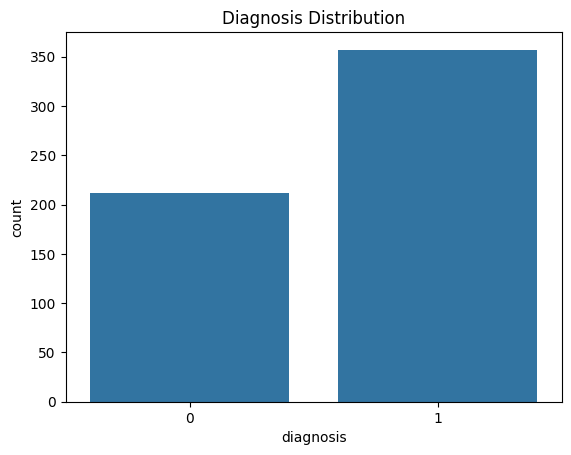

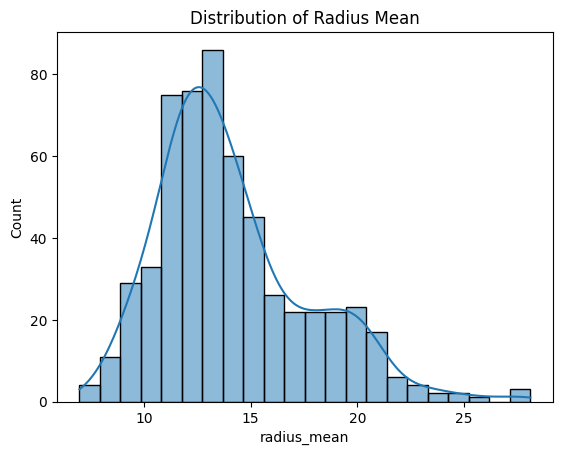

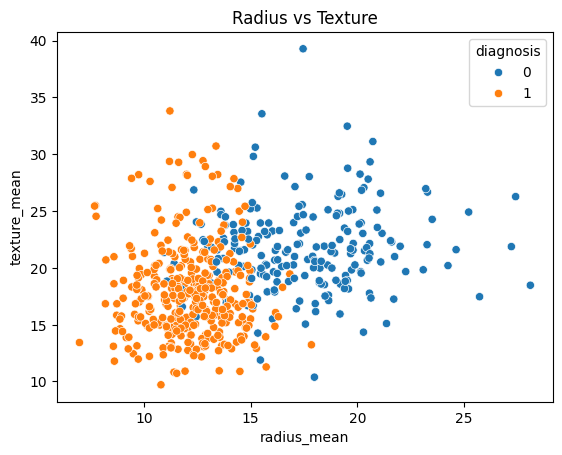

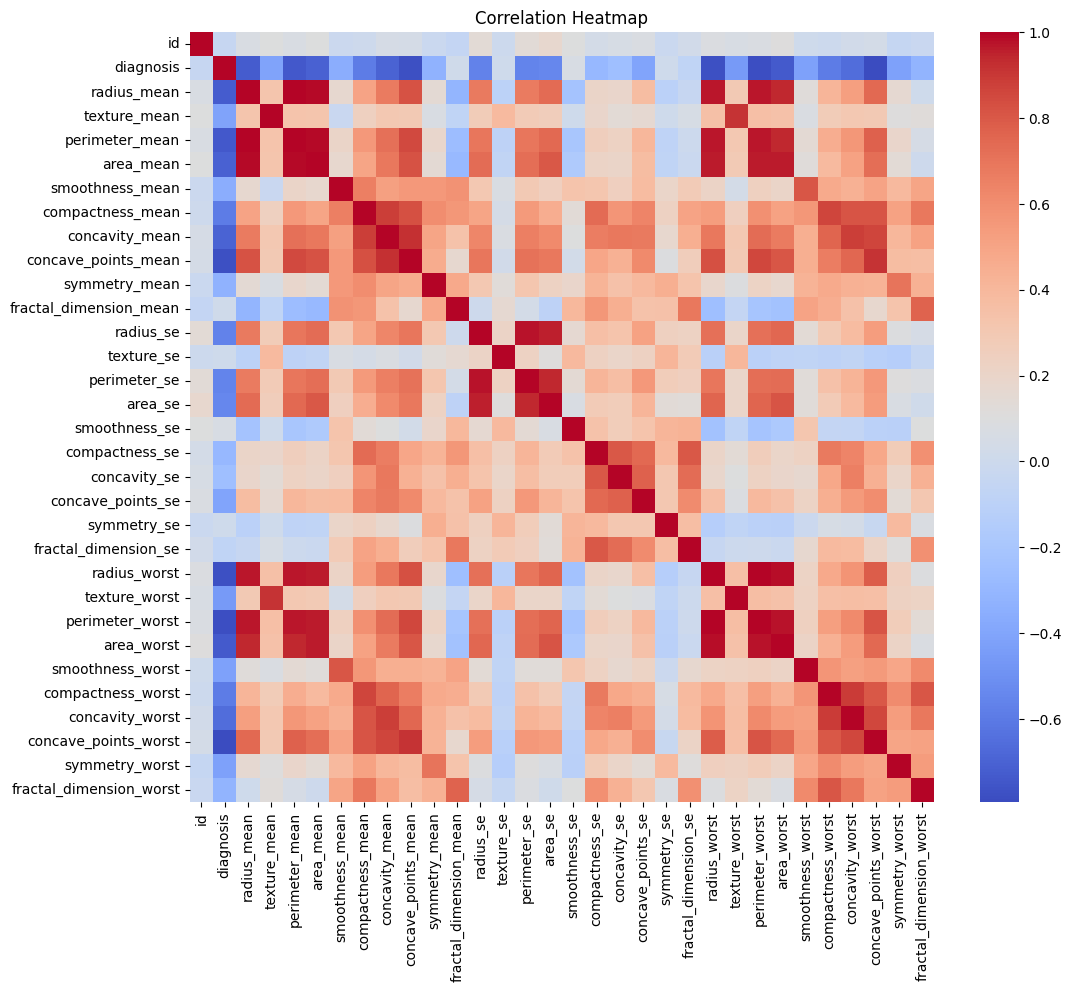

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
my_data['diagnosis'] = my_data['diagnosis'].map({'M': 0, 'B': 1})

sns.countplot(x='diagnosis', data=my_data)
plt.title("Diagnosis Distribution")
plt.show()
sns.histplot(my_data['radius_mean'], kde=True)
plt.title("Distribution of Radius Mean")
plt.show()
sns.scatterplot(data=my_data, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title("Radius vs Texture")
plt.show()
plt.figure(figsize=(12, 10))
corr = my_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


Build Classification Models (Logistic regression – Decision
Tree)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


log_model = LogisticRegression(max_iter=10000)  # max_iter عالي لضمان استقرار التدريب
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
from sklearn.metrics import classification_report
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classification Report:

              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



Confusion Matrix

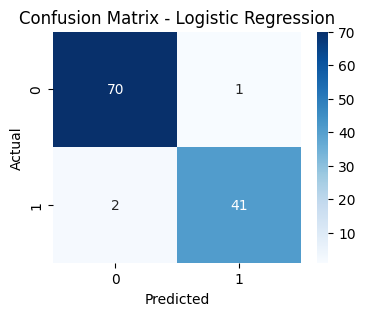

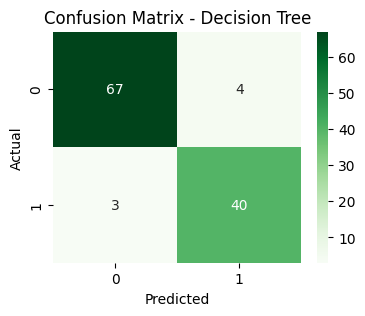

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Overfitting or underfitting if any and solve it

In [17]:

train_acc_log = log_model.score(X_train, y_train)
test_acc_log = log_model.score(X_test, y_test)

print("=== Logistic Regression ===")
print(f"Train Accuracy: {train_acc_log:.2f}")
print(f"Test Accuracy: {test_acc_log:.2f}")
print("--------------------------")
train_acc_tree = tree_model.score(X_train, y_train)
test_acc_tree = tree_model.score(X_test, y_test)
print("=== Decision Tree ===")
print(f"Train Accuracy: {train_acc_tree:.2f}")
print(f"Test Accuracy: {test_acc_tree:.2f}")


=== Logistic Regression ===
Train Accuracy: 0.99
Test Accuracy: 0.97
--------------------------
=== Decision Tree ===
Train Accuracy: 1.00
Test Accuracy: 0.94
